# Random Forest

Entrena dos modelos distintos:
- Uno para clasificar si el ingreso supera cierto umbral
- Otro para predecir un valor continuo (ingreso/días)

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    mean_squared_error, r2_score
)
import matplotlib.pyplot as plt

# Generar datos sintéticos
np.random.seed(42)
n = 200
X = pd.DataFrame({
    "edad": np.random.randint(18, 70, size=n),
    "ingreso": np.random.randint(200000, 1500000, size=n),
    "dias_de_uso": np.random.randint(1, 30, size=n)
})

## Modelo de Clasificación

In [21]:
# Objetivo para clasificación: 1 si ingreso > 800.000
y_clasificacion = (X["ingreso"] > 800000).astype(int)

# Separar datos
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_clasificacion, test_size=0.2, random_state=42)

In [24]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_c, y_train_c)
y_pred_c = clf.predict(X_test_c)

print("Clasificación:")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Matriz de Confusión:\n", confusion_matrix(y_test_c, y_pred_c))
print("Reporte:\n", classification_report(y_test_c, y_pred_c))


Clasificación:
Accuracy: 1.0
Matriz de Confusión:
 [[19  0]
 [ 0 21]]
Reporte:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



## Modelo de Regresión

In [25]:
# Objetivo para regresión: ingreso dividido por días_de_uso + ruido
y_regresion = (X["ingreso"] / X["dias_de_uso"]) + np.random.normal(0, 10000, n)

# Separar datos
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_regresion, test_size=0.2, random_state=42)


 Regresión:
MSE: 1427613982.227763
R²: 0.9037099436031113


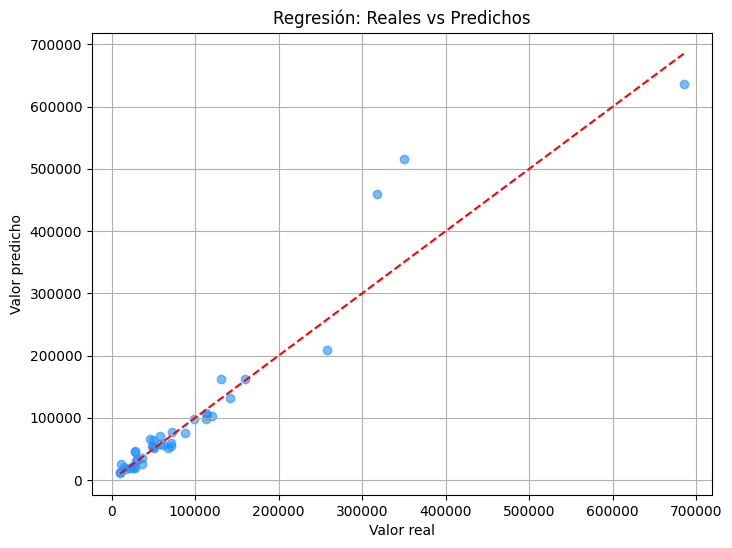

In [28]:
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_r, y_train_r)
y_pred_r = reg.predict(X_test_r)

print("\n Regresión:")
print("MSE:", mean_squared_error(y_test_r, y_pred_r))
print("R²:", r2_score(y_test_r, y_pred_r))

# Visualización de regresión
plt.figure(figsize=(8, 6))
plt.scatter(y_test_r, y_pred_r, color='dodgerblue', alpha=0.6)
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--')
plt.xlabel("Valor real")
plt.ylabel("Valor predicho")
plt.title("Regresión: Reales vs Predichos")
plt.grid(True)
plt.show()